In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
plt.style.use('fivethirtyeight')

In [ ]:
from sklearn.datasets import make_classification
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, RepeatedKFold,RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import missingno as msno

from sklearn.metrics import roc_curve, roc_auc_score, auc

from sklearn.model_selection import learning_curve

In [ ]:
df=pd.read_csv('/content/market_risk - Sheet1.csv')

In [ ]:
df.head()

,DATE,ASSET_A,ASSET_B,ASSET_C,ASSET_D,ASSET_E
0,7/1/2022,0.009,-0.003,0.010,0.010,-0.008
1,7/2/2022,-0.010,0.006,0.001,0.005,0.007
2,7/3/2022,-0.002,0.010,-0.006,0.002,-0.004
3,7/4/2022,-0.007,-0.008,0.003,-0.002,0.001
4,7/5/2022,-0.003,-0.003,0.005,-0.008,-0.009


In [ ]:
import matplotlib as plt

In [ ]:
df

,DATE,ASSET_A,ASSET_B,ASSET_C,ASSET_D,ASSET_E
0,7/1/2022,0.009,-0.003,0.010,0.010,-0.008
1,7/2/2022,-0.010,0.006,0.001,0.005,0.007
2,7/3/2022,-0.002,0.010,-0.006,0.002,-0.004
3,7/4/2022,-0.007,-0.008,0.003,-0.002,0.001
4,7/5/2022,-0.003,-0.003,0.005,-0.008,-0.009
...,...,...,...,...,...,...
371,7/7/2023,0.009,0.003,0.001,0.000,-0.005
372,7/8/2023,0.007,-0.003,0.008,0.008,-0.006
373,7/9/2023,-0.005,-0.001,-0.008,-0.006,-0.004
374,7/10/2023,-0.005,-0.003,0.000,-0.009,0.005


In [ ]:
df.columns

Index(['DATE', 'ASSET_A', 'ASSET_B', 'ASSET_C', 'ASSET_D', 'ASSET_E'], dtype='object')

### Preprocessing of data


In [ ]:
df.shape

(376, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     376 non-null    object 
 1   ASSET_A  376 non-null    float64
 2   ASSET_B  376 non-null    float64
 3   ASSET_C  376 non-null    float64
 4   ASSET_D  376 non-null    float64
 5   ASSET_E  376 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.8+ KB


In [ ]:
for cols in df.columns:
  for i in range(df.shape[0]):
    if(df[cols].iloc[i])==0:
        df[cols].iloc[i]=df[cols].iloc[i-1]

# **Visualizing Data**

array([[<Axes: title={'center': 'ASSET_A'}>,
        <Axes: title={'center': 'ASSET_B'}>],
       [<Axes: title={'center': 'ASSET_C'}>,
        <Axes: title={'center': 'ASSET_D'}>],
       [<Axes: title={'center': 'ASSET_E'}>, <Axes: >]], dtype=object)

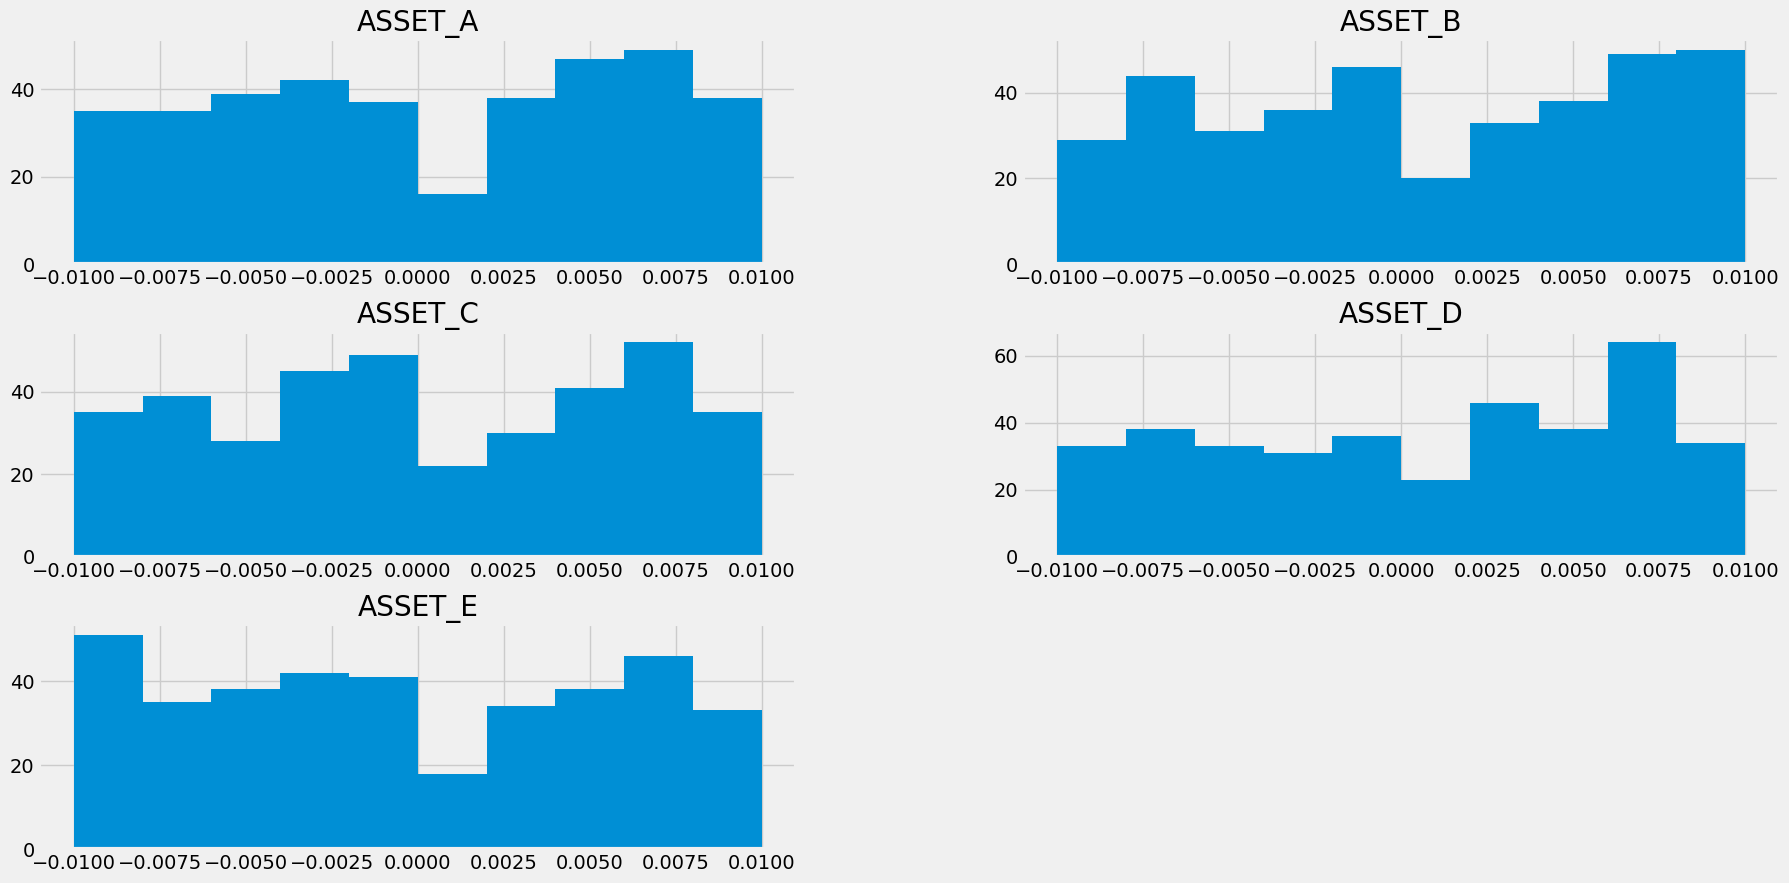

In [ ]:
df.hist(figsize=(20,10))

In [ ]:
import seaborn as sns

In [ ]:
df

,DATE,ASSET_A,ASSET_B,ASSET_C,ASSET_D,ASSET_E
0,7/1/2022,0.009,-0.003,0.010,0.010,-0.008
1,7/2/2022,-0.010,0.006,0.001,0.005,0.007
2,7/3/2022,-0.002,0.010,-0.006,0.002,-0.004
3,7/4/2022,-0.007,-0.008,0.003,-0.002,0.001
4,7/5/2022,-0.003,-0.003,0.005,-0.008,-0.009
...,...,...,...,...,...,...
371,7/7/2023,0.009,0.003,0.001,0.001,-0.005
372,7/8/2023,0.007,-0.003,0.008,0.008,-0.006
373,7/9/2023,-0.005,-0.001,-0.008,-0.006,-0.004
374,7/10/2023,-0.005,-0.003,-0.008,-0.009,0.005


<Axes: >

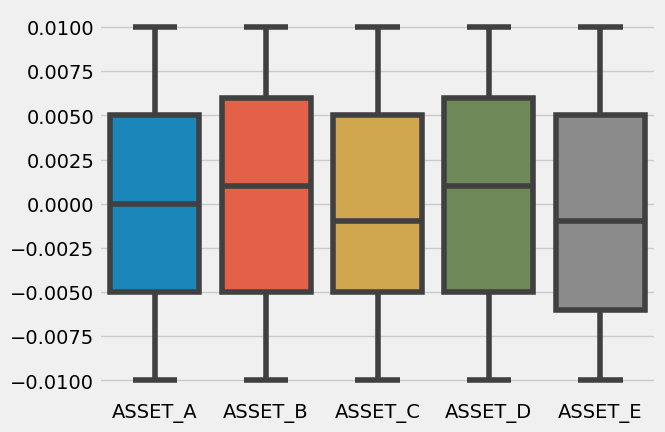

In [ ]:
sns.boxplot(data=df)

Calculating correlation among the columns to ascertain any correlation between the 'int64' type 
As we know, the correlation of a variable with itself is 1, which explains why the diagonal values will be all 1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#showing correlation
cor=df.corr()        #using the kendall method to calculate correlation
top_corr_features=cor.index
plt.figure(figsize=(40,40))
plt.tight_layout()
cor

,ASSET_A,ASSET_B,ASSET_C,ASSET_D,ASSET_E
ASSET_A,1.000000,0.028448,-0.012809,0.002216,0.120407
ASSET_B,0.028448,1.000000,0.103875,0.072939,0.014652
ASSET_C,-0.012809,0.103875,1.000000,0.020318,-0.037337
ASSET_D,0.002216,0.072939,0.020318,1.000000,0.060644
ASSET_E,0.120407,0.014652,-0.037337,0.060644,1.000000


<Figure size 4000x4000 with 0 Axes>

In [ ]:
top_corr_features

Index(['ASSET_A', 'ASSET_B', 'ASSET_C', 'ASSET_D', 'ASSET_E'], dtype='object')

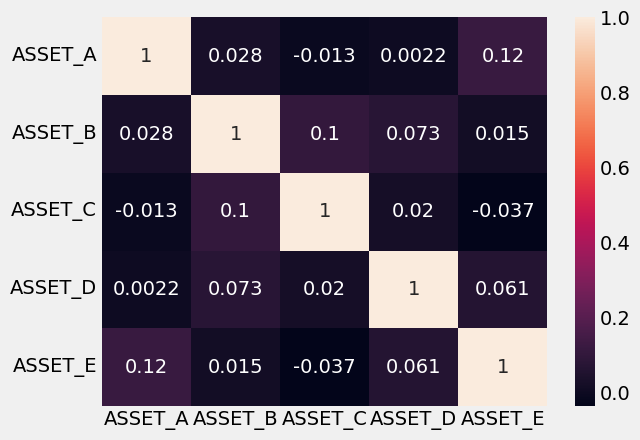

In [ ]:
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [ ]:
col=len(df.columns)-1

In [ ]:
string1='RET_'
string2='ASSET_'
a=64
for i in range(1,col+1):
  col_ret=string1+chr(a+i)
  col_name=string2+chr(a+i)
  df[col_ret]=-1
  for j in range(0,len(df[col_name])-1):
    val=(df[col_name][j+1]-df[col_name][j])/df[col_name][j]
    df[col_ret][j]=round(val,3)
  df[col_ret].iloc[-1]=df[col_name].iloc[-1]

In [ ]:
weight = 0.5
string ='ASSET_'
df['portfolio_ret'] = -1;
a=64
for i in range(1,col):
  assest_name=string+chr(a+i)
  df['portfolio_ret'] += weight * df[assest_name]

In [ ]:
df['portfolio_ret']

0     -0.9870
1     -0.9990
2     -0.9980
3     -1.0070
4     -1.0045
        ...  
371   -0.9930
372   -0.9900
373   -1.0100
374   -1.0125
375   -0.9930
Name: portfolio_ret, Length: 376, dtype: float64

In [ ]:
std_pf_ret = df['portfolio_ret'].std()
std_pf_ret

0.006449372392358695

In [ ]:
df.columns

Index(['DATE', 'ASSET_A', 'ASSET_B', 'ASSET_C', 'ASSET_D', 'ASSET_E',
       'portfolio_ret', 'RET_A', 'RET_B', 'RET_C', 'RET_D', 'RET_E'],
      dtype='object')

In [ ]:
df

,DATE,ASSET_A,ASSET_B,ASSET_C,ASSET_D,ASSET_E,portfolio_ret,RET_A,RET_B,RET_C,RET_D,RET_E
0,7/1/2022,0.009,-0.003,0.010,0.010,-0.008,-0.9870,-2.111,-3.000,-0.900,-0.500,-1.875
1,7/2/2022,-0.010,0.006,0.001,0.005,0.007,-0.9990,-0.800,0.667,-7.000,-0.600,-1.571
2,7/3/2022,-0.002,0.010,-0.006,0.002,-0.004,-0.9980,2.500,-1.800,-1.500,-2.000,-1.250
3,7/4/2022,-0.007,-0.008,0.003,-0.002,0.001,-1.0070,-0.571,-0.625,0.667,3.000,-10.000
4,7/5/2022,-0.003,-0.003,0.005,-0.008,-0.009,-1.0045,-0.667,-0.000,-1.800,-1.375,-0.778
...,...,...,...,...,...,...,...,...,...,...,...,...
371,7/7/2023,0.009,0.003,0.001,0.001,-0.005,-0.9930,-0.222,-2.000,7.000,7.000,0.200
372,7/8/2023,0.007,-0.003,0.008,0.008,-0.006,-0.9900,-1.714,-0.667,-2.000,-1.750,-0.333
373,7/9/2023,-0.005,-0.001,-0.008,-0.006,-0.004,-1.0100,-0.000,2.000,-0.000,0.500,-2.250
374,7/10/2023,-0.005,-0.003,-0.008,-0.009,0.005,-1.0125,-1.800,-3.000,-1.750,-0.778,-0.400


Importing the pickle file to load pickle values

In [ ]:
import pickle
import joblib

In [ ]:
joblib.dump(std_pf_ret,'std_dev.pkl')

['std_dev.pkl']